# Pre-processing and acquiring the data
Getting the Wikipedia page

In [1]:
import numpy as np                                # library to handle data in a vectorized manner
import pandas as pd                               # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json                                       # library to handle JSON files
import requests                                   # library to handle requests
from pandas.io.json import json_normalize         # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm                        # Matplotlib and associated plotting modules
import matplotlib.colors as colors

from sklearn.cluster import KMeans                # import k-means from clustering stage

#!conda install -c conda-forge geopy --yes        # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim             # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium                                     # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(url).text

In [3]:
from bs4 import BeautifulSoup
beautiful_soup = BeautifulSoup(html_data, "html5lib")


Okay let's breakdown what I did here. I replaces Not assigned with a nan value and then dropped for boroughs and filled the neighboorhood names.

Next, I will conbine neighboorhoods with the same postal code as required

In [5]:
table_contents=[]
table=beautiful_soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [6]:
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


Getting Co-ordinate data
Geocoder was not running smoothly so i just downloaded the csv

In [7]:
geocode = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')
geocode.rename(columns={"Postal Code": "PostalCode"}, inplace=True)

In [8]:
df_geocode = pd.merge(df, geocode, how ='inner', on ='PostalCode')
df_geocode

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [9]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(df_geocode['Borough'].unique()),df_geocode.shape[0]))

The dataframe has 15 boroughs and 103 neighborhoods.


# As suggested, let's work with boroughs that contain the word Toronto:

In [12]:
df_toronto = df_geocode[df_geocode['Borough'].str.contains('Toronto')].reset_index(drop=True)
df_toronto

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259
9,M4J,East York/East Toronto,The Danforth East,43.685347,-79.338106


In [13]:
df_toronto[["Borough"]].value_counts()

Borough               
Downtown Toronto          17
Central Toronto            9
West Toronto               6
East Toronto               4
Downtown Toronto Stn A     1
East Toronto Business      1
East York/East Toronto     1
dtype: int64

Searching for Toronto's coordinates using google and plotting the map using Folium:

lat: 43.651070

lon: -79.347015

In [14]:
lat = 43.651070
lon = -79.347015

map_toronto = folium.Map(location=[lat, lon],zoom_start=10)

folium.CircleMarker(
                    [lat, lon],
                    radius=10,
                    popup='Toronto',
                    fill=True,
                    color='red',
                    fill_color='red',
                    fill_opacity=0.6).add_to(map_toronto)
map_toronto

In [15]:
for lat, lon, borough, neighborhood in zip(df_toronto['Latitude'],df_toronto['Longitude'],df_toronto['Borough'],df_toronto['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='yellow',
        fill_opacity=0.5
        ).add_to(map_toronto)
map_toronto

We will use the Foursquare API to explore the neighborhoods of downtown Toronto.

Define Foursquare Credentials and Version

In [16]:
CLIENT_ID = 'P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO' # your Foursquare ID
CLIENT_SECRET = '3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H' # your Foursquare Secret
ACCESS_TOKEN = "L5FWYDVVHZXJ4GKNOAD45X22X5MVYZJIFJHE1YJXFGDFB4YN" # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: P5MNEPLK4OXEDGPBP45SWSLTU1TY4R1DU4ZGMFBBOZCP23MO
CLIENT_SECRET:3UTVUFOEVCRFZU5RGBMOSR4AFQG4BB4XXVN0P1NQMQNEFK2H


### Explore a neighborhood, let's choose the first one on the dataframe.
Get the neighborhood's name# 

In [17]:
df_downtown_toronto = df_toronto[df_toronto['Borough'] == 'Downtown Toronto'].reset_index(drop=True)

df_downtown_toronto.loc[0,'Neighborhood']

'Regent Park, Harbourfront'

In [18]:
address = 'Downtown Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate Downtown Toronto, are {}, {}.'.format(latitude, longitude))

neighborhood_latitude = df_downtown_toronto.loc[0,'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_downtown_toronto.loc[0,'Longitude'] # neighborhood longitude value

neighborhood_name = df_downtown_toronto.loc[0,'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

The geograpical coordinate Downtown Toronto, are 43.6563221, -79.3809161.
Latitude and longitude values of Regent Park, Harbourfront are 43.6542599, -79.3606359.


Let's see the top 100 locations that are on Marble Hill within a radius of 500 meters

In [19]:
LIMIT = 100
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [20]:
results = requests.get(url).json()
#results

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']

nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Corktown Common,Park,43.655618,-79.356211


And how many venues were returned by Foursquare?

In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


Exploring more than one neighborhood in Downtown Toronto.
Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called _toronto_downtown_venues_.

In [27]:
downtown_venues = getNearbyVenues(names=df_downtown_toronto['Neighborhood'],
                                   latitudes=df_downtown_toronto['Latitude'],
                                   longitudes=df_downtown_toronto['Longitude']
                                  )

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [30]:
print(downtown_venues.shape)
downtown_venues.head()

(1096, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Corktown Common,43.655618,-79.356211,Park


Let's check how many venues were returned for each neighborhood

In [31]:
downtown_venues.groupby("Neighborhood").count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",17,17,17,17,17,17
Central Bay Street,63,63,63,63,63,63
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100


Let's find out how many exclusive categories can be selected from all locations returned

In [32]:
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 209 uniques categories.


### Analyzing the categories of each neighborhood in downtown Toronto.

In [33]:
downtown_venues.head(2)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop


In [35]:
#one hot encoding
downtown_toronto_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_toronto_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_toronto_onehot.columns[-1]] + list(downtown_toronto_onehot.columns[:-1])
downtown_toronto_onehot = downtown_toronto_onehot[fixed_columns]

downtown_toronto_onehot.shape

(1096, 209)

Group the lines by neighborhood and average the occurrence of each category.

In [37]:
downtown_grouped = downtown_toronto_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped.head()

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.017241,0.000000,0.0,0.0,0.0000,0.0,0.0000,0.017241,0.034483,0.000000,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.017241,0.017241,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.017241,0.0000,0.000000,0.034483,0.0,0.0,0.017241,0.051724,0.086207,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.0,0.0,0.017241,0.0,0.000000,0.0,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.017241,0.0,0.000000,0.000000,0.0,0.000000,0.034483,0.000000,0.0,0.017241,0.000000,0.0,0.0,0.017241,0.017241,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017241,0.017241,0.017241,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.017241,0.0,0.000000,0.0,0.000000,0.017241,0.017241,0.0,0.000000,0.000000,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.017

Let's confirm the new size

In [38]:
downtown_grouped.shape

(17, 209)

### Print each neighborhood along with the 10 most common locations

In [39]:
num_top_venues = 10

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2            Beer Bar  0.03
3              Bakery  0.03
4      Farmers Market  0.03
5          Restaurant  0.03
6            Pharmacy  0.03
7  Seafood Restaurant  0.03
8         Cheese Shop  0.03
9      Clothing Store  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.18
1       Airport Lounge  0.12
2     Airport Terminal  0.12
3        Boat or Ferry  0.06
4             Boutique  0.06
5  Rental Car Location  0.06
6     Sculpture Garden  0.06
7      Harbor / Marina  0.06
8                  Bar  0.06
9                Plane  0.06


----Central Bay Street----
                       venue  freq
0                Coffee Shop  0.17
1             Sandwich Place  0.06
2         Italian Restaurant  0.06
3                       Café  0.05
4            Bubble Tea Shop  0.

#### Let's put that into a pandas dataframe

First, let's write a function to sort the venues in descending order

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Putting the top 10 venues of each neighborhood results into a pandas dataframe

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Farmers Market,Restaurant,Pharmacy,Seafood Restaurant,Cheese Shop,Clothing Store
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Boutique,Rental Car Location,Sculpture Garden,Harbor / Marina,Bar,Plane
2,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Burger Joint,Salad Place,Middle Eastern Restaurant,Yoga Studio,French Restaurant
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Baby Store,Italian Restaurant,Restaurant,Nightclub,Candy Store,Coffee Shop
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Men's Store,Fast Food Restaurant,Pub


## Clustering Downtown Toronto's Neighborhoods

Assessing Clustering using Elbow

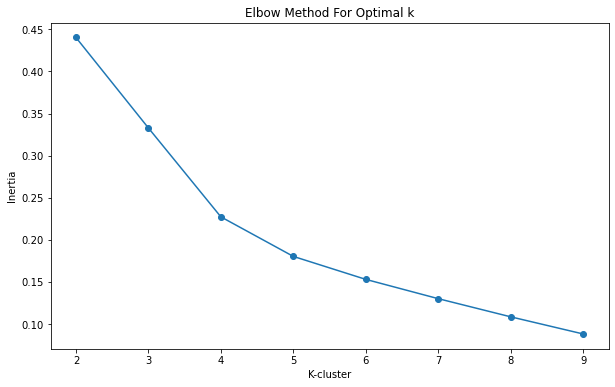

In [44]:
import matplotlib.pyplot as plt
# Lista de valores de K
Ks = range(2, 10)


downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# Lista para as métricas
valores_metrica = []

# Loop por diferentes modelos com diferentes valores de K
for K in Ks:
    modelo = KMeans(n_clusters = K, random_state = 101)
    modelo.fit(downtown_grouped_clustering)
    valores_metrica.append(modelo.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(Ks, valores_metrica, 'o-')
plt.xlabel("K-cluster")
plt.ylabel("Inertia")
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
from sklearn.metrics import silhouette_score

for i in range(3,8):
    
  kmeans_ = KMeans(n_clusters=i).fit(downtown_grouped_clustering)
  labels_ = kmeans_.labels_
  coef = silhouette_score(downtown_grouped_clustering,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

N_cluster: 3, score: 0.39287028059053486
N_cluster: 4, score: 0.39700714663234443
N_cluster: 5, score: 0.24785217139511997
N_cluster: 6, score: 0.06528201812898331
N_cluster: 7, score: 0.05749552332503373


In [46]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

Creating a new dataframe that includes the cluster + top 10 venues for each neighborhood + the neiborhood geocoordenates.

In [47]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Farmers Market,Restaurant,Pharmacy,Seafood Restaurant,Cheese Shop,Clothing Store
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Boutique,Rental Car Location,Sculpture Garden,Harbor / Marina,Bar,Plane
2,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Burger Joint,Salad Place,Middle Eastern Restaurant,Yoga Studio,French Restaurant
3,Christie,Grocery Store,Café,Park,Athletics & Sports,Baby Store,Italian Restaurant,Restaurant,Nightclub,Candy Store,Coffee Shop
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Mediterranean Restaurant,Men's Store,Fast Food Restaurant,Pub
5,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Japanese Restaurant,American Restaurant,Seafood Restaurant,Deli / Bodega
6,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Gym,American Restaurant,Steakhouse,Seafood Restaurant,Asian Restaurant
7,"Garden District, Ryerson",Coffee Shop,Clothing Store,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Café,Cosmetics Shop,Lingerie Store,Hotel,Theater
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Brewery,Scenic Lookout,Sporting Goods Shop,Restaurant,Fried Chicken Joint,Italian Restaurant
9,"Kensington Market, Chinatown, Grange Park",Café,Coffee Shop,Vegetarian / Vegan Restaurant,Mexican Restaurant,Vietnamese Restaurant,Park,Grocery Store,Burger Joint,Gaming Cafe,Bar


In [48]:
# adding clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_toronto_merged = df_toronto

# merging neighborhoods_venues_sorted with df_downtown_toronto to add latitude/longitude for each neighborhood

downtown_toronto_merged = downtown_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_toronto_merged.head() # checking the first columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Café,Bakery,Park,Breakfast Spot,Restaurant,Theater,Pub,Yoga Studio,Cosmetics Shop
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Coffee Shop,Clothing Store,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Café,Cosmetics Shop,Lingerie Store,Hotel,Theater
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,Coffee Shop,Café,Cocktail Bar,Hotel,Cosmetics Shop,Gastropub,Gym,Seafood Restaurant,Moroccan Restaurant,Italian Restaurant
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0.0,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Farmers Market,Restaurant,Pharmacy,Seafood Restaurant,Cheese Shop,Clothing Store


### Map to visualize Clustered neighborhoods
Finally, let's visualize the resulting clusters

In [60]:
downtown_toronto_merged = downtown_toronto_merged.dropna(how='any')
downtown_toronto_merged.head()
downtown_toronto_merged['Cluster Labels'] = downtown_toronto_merged['Cluster Labels'].astype(int)

In [61]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_toronto_merged['Latitude'], downtown_toronto_merged['Longitude'], downtown_toronto_merged['Neighborhood'], downtown_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examine Clusters

We can now examine each cluster and determine how categories of discriminating locations

Cluster 1

In [63]:
cluster_1=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 0, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_1

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Café,Bakery,Park,Breakfast Spot,Restaurant,Theater,Pub,Yoga Studio,Cosmetics Shop
1,Downtown Toronto,0,Coffee Shop,Clothing Store,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Café,Cosmetics Shop,Lingerie Store,Hotel,Theater
2,Downtown Toronto,0,Coffee Shop,Café,Cocktail Bar,Hotel,Cosmetics Shop,Gastropub,Gym,Seafood Restaurant,Moroccan Restaurant,Italian Restaurant
4,Downtown Toronto,0,Coffee Shop,Cocktail Bar,Beer Bar,Bakery,Farmers Market,Restaurant,Pharmacy,Seafood Restaurant,Cheese Shop,Clothing Store
5,Downtown Toronto,0,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Burger Joint,Salad Place,Middle Eastern Restaurant,Yoga Studio,French Restaurant
6,Downtown Toronto,0,Grocery Store,Café,Park,Athletics & Sports,Baby Store,Italian Restaurant,Restaurant,Nightclub,Candy Store,Coffee Shop
7,Downtown Toronto,0,Coffee Shop,Café,Restaurant,Thai Restaurant,Gym,Clothing Store,Deli / Bodega,Bookstore,Steakhouse,Salad Place
10,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Brewery,Scenic Lookout,Sporting Goods Shop,Restaurant,Fried Chicken Joint,Italian Restaurant
13,Downtown Toronto,0,Coffee Shop,Hotel,Café,Seafood Restaurant,Italian Restaurant,Restaurant,Salad Place,Japanese Restaurant,American Restaurant,Deli / Bodega
16,Downtown Toronto,0,Coffee Shop,Restaurant,Hotel,Café,Italian Restaurant,Gym,Japanese Restaurant,American Restaurant,Seafood Restaurant,Deli / Bodega


In [64]:
cluster_2=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 1, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_2

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,Downtown Toronto,1,Park,Playground,Trail,Monument / Landmark,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant


In [65]:
cluster_3=downtown_toronto_merged.loc[downtown_toronto_merged['Cluster Labels'] == 2, 
                            downtown_toronto_merged.columns[[1] + list(range(5, downtown_toronto_merged.shape[1]))]]
cluster_3

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Downtown Toronto,2,Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Boutique,Rental Car Location,Sculpture Garden,Harbor / Marina,Bar,Plane
